In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")
df = pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
df.iloc[:, :].isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.iloc[:, :].isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

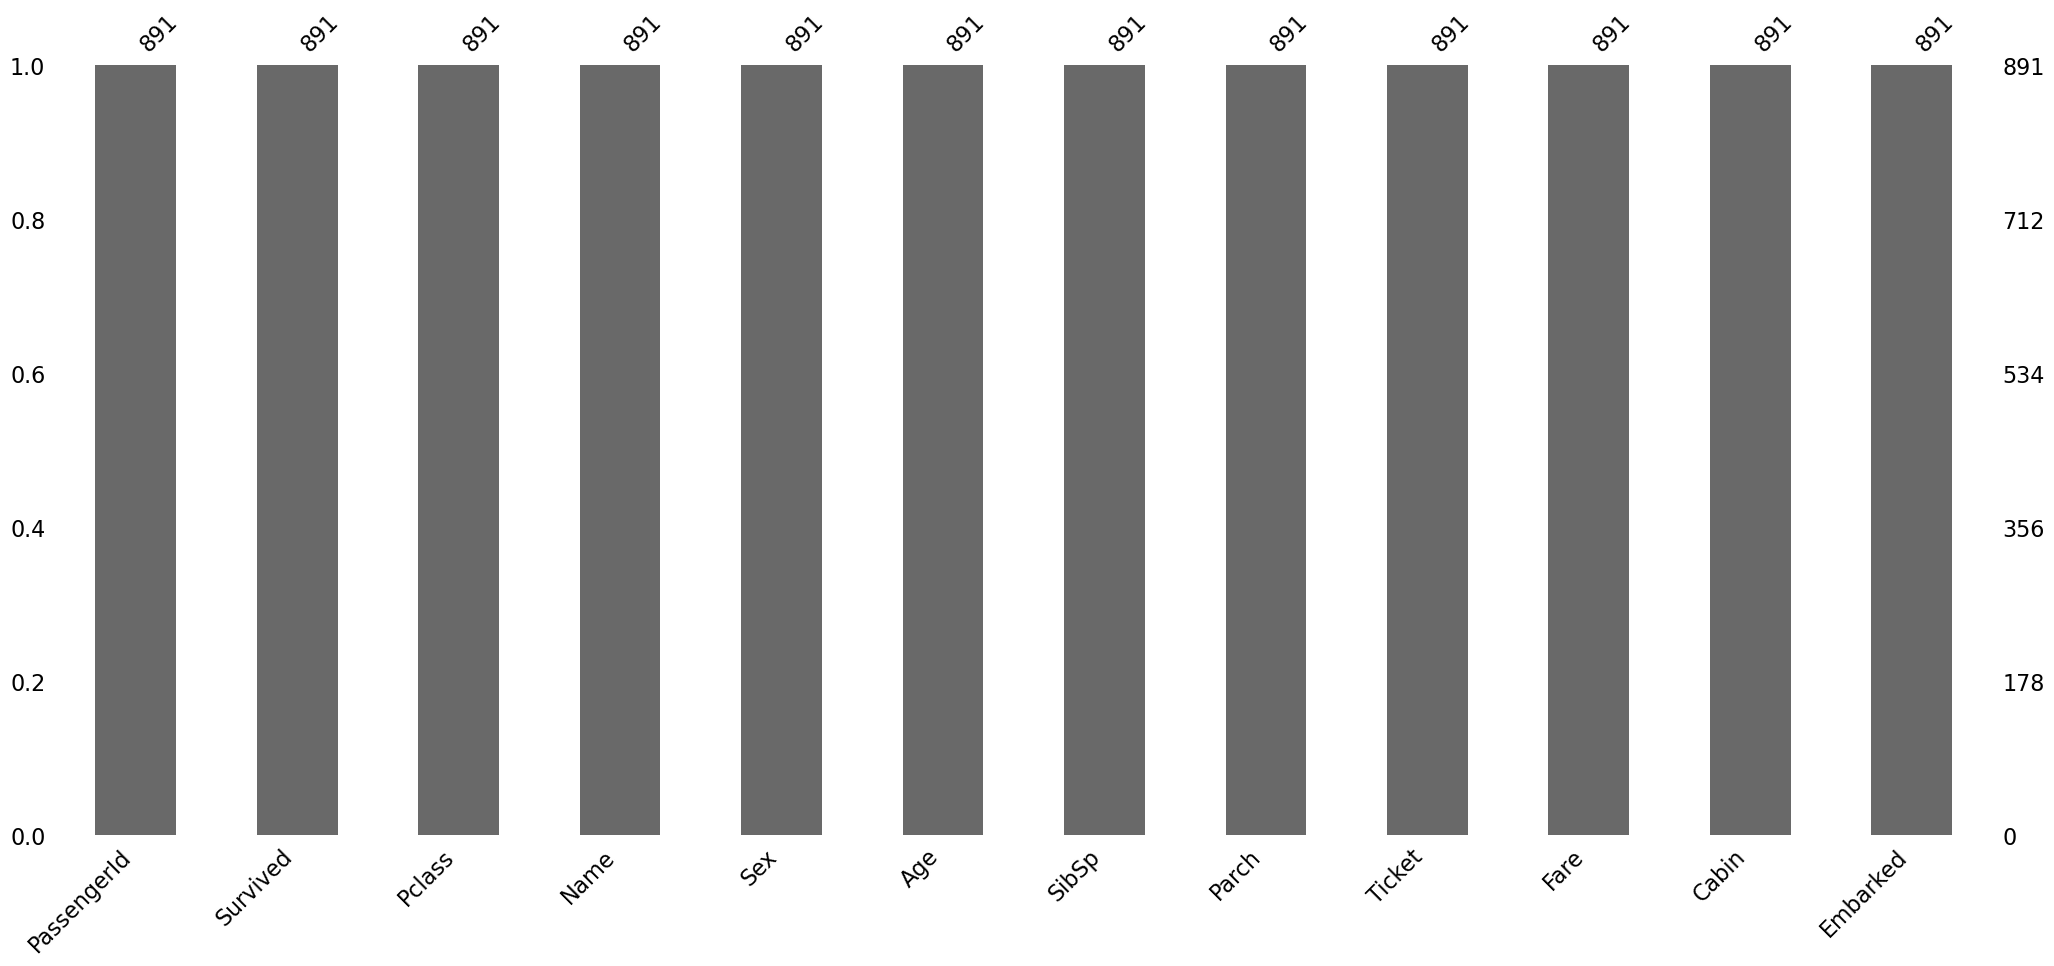

In [5]:
import missingno as msno

df = df.fillna(df.mode().iloc[0])
msno.bar(df)

In [6]:
y = df.iloc[:, 1:2].values
features = ["Pclass", "Sex", "Age", "SibSp", "Parch"]
x = pd.get_dummies(df[features], drop_first=True)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [8]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, max_depth =  7)
rf.fit(x_train, y_train.ravel())
y_pred = rf.predict(x_test)



In [9]:
"""
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train.ravel())
y_pred=nb.predict(x_test)
"""

'\nfrom sklearn.naive_bayes import GaussianNB\nnb = GaussianNB()\nnb.fit(x_train, y_train.ravel())\ny_pred=nb.predict(x_test)\n'

In [10]:
"""
from sklearn. linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)
"""

'\nfrom sklearn. linear_model import LogisticRegression\nlr = LogisticRegression()\nlr.fit(x_train, y_train)\ny_pred=lr.predict(x_test)\n'

In [11]:
import statsmodels.api as sm


model = sm.OLS(y,x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.415
Model:                            OLS   Adj. R-squared (uncentered):              0.412
Method:                 Least Squares   F-statistic:                              125.9
Date:                Thu, 20 Apr 2023   Prob (F-statistic):                   9.58e-101
Time:                        14:23:04   Log-Likelihood:                         -598.50
No. Observations:                 891   AIC:                                      1207.
Df Residuals:                     886   BIC:                                      1231.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8212290502793296


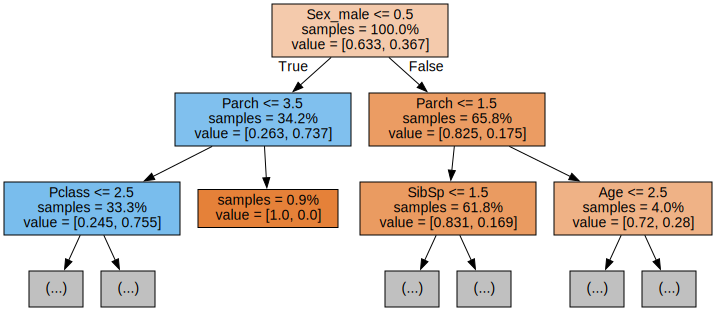

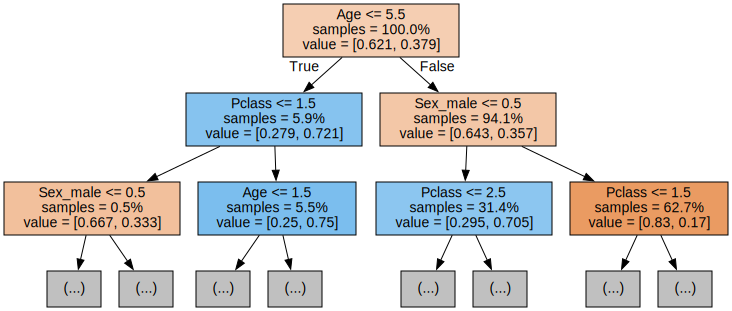

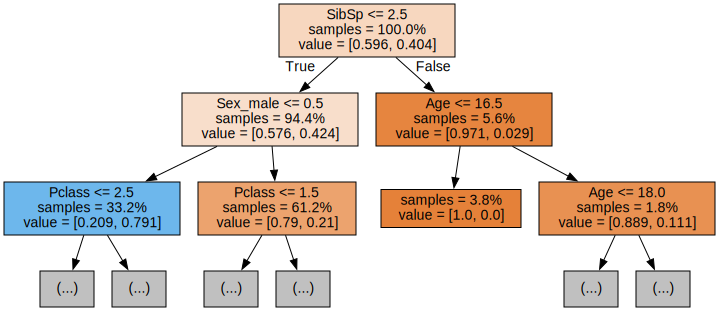

In [13]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [14]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch"]

In [15]:
test = test.fillna(test.mode().iloc[0])
x_test = pd.get_dummies(test[features],drop_first=True)

In [16]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(x, y.ravel())
predictions = model.predict(x_test)

In [17]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('titanic.csv', index=False)
print("debug")

debug
